# Background Overview

In recent years, the global gaming market has seen rapid and sustained growth, with console games, handheld games, and cross-platform titles all flourishing. Competition among major game companies and platforms has become increasingly intense. Industry giants like Nintendo, Sony, and Microsoft continue to dominate large market shares, while emerging platforms and independent game developers are making strong impressions. With innovative gameplay and unique strategies, these newcomers are quickly attracting users and becoming a force to be reckoned with.

This project is based on global video game sales data compiled from the Kaggle database. It takes a comprehensive look at the competitive landscape of the gaming industry from multiple perspectives, including platform distribution, game genres, regional preferences, and publisher competition. The goal is to identify the key factors behind top-selling games and to uncover user preferences and market trends across different platforms and regions.

Through this analysis, we aim to provide insights that can help gaming companies refine their market positioning, content strategy, and long-term planning. Ultimately, the goal is to support better alignment between products and player expectations, strengthen market presence, and drive greater commercial success in an increasingly competitive global market.

# Introduction and Data Loading

The video game sales dataset provides information such as the game's rank, name, platform, release year, genre, publisher and sales in various regions.

Features:
**Rank** - Ranking of overall sales
**Name** - The games name
**Platform** - Platform of the games release ( PC,PS4)
**Year** - Year of the game's release
**Genre** - Genre of the game
**Publisher** - Publisher of the game
**NA_Sales** - Sales in North America (in millions)
**EU_Sales** - Sales in Europe (in millions)
**JP_Sales** - Sales in Japan (in millions)
**Other_Sales** - Sales in the rest of the world (in millions)
**Global_Sales** - Total worldwide sales.

**Data Source**: <https://www.kaggle.com/datasets/anandshaw2001/video-game-sales>

In [1]:
# Importing necessary libraries and suppressing warnings
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib

# Use Agg backend if using full matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_style('whitegrid')

# Load the dataset
video_games = pd.read_csv('vgsales.csv')

# Display the first few rows
video_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Cleaning and Preprocessing

Before diving into analysis, it is important to check the data for any inconsistencies such as missing or invalid values.

In [2]:
# Check for missing values
video_games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
# Calculate the proportion of missing values relative to the entire dataset
missing_ratio = video_games.isnull().mean() * 100
print(missing_ratio)

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


In [4]:
# Since missing values account for less than 5% of the entire dataset, I decide to remove them
video_games.dropna(inplace=True)
video_games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [5]:
# Display the data type and non-null count for each column
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
# Year feature has wrong data type. Therefore, convert it to integer data type for further analysis.
video_games['Year'] = video_games['Year'].astype('int64')
print(video_games['Year'].dtype)

int64


In [7]:
# Checking for the duplicates
video_games.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

Now that the data has been tidied up, let’s dive into some exploratory data analysis.

### Analysis of the Number of Game Released

#### Number of Games Released By Year

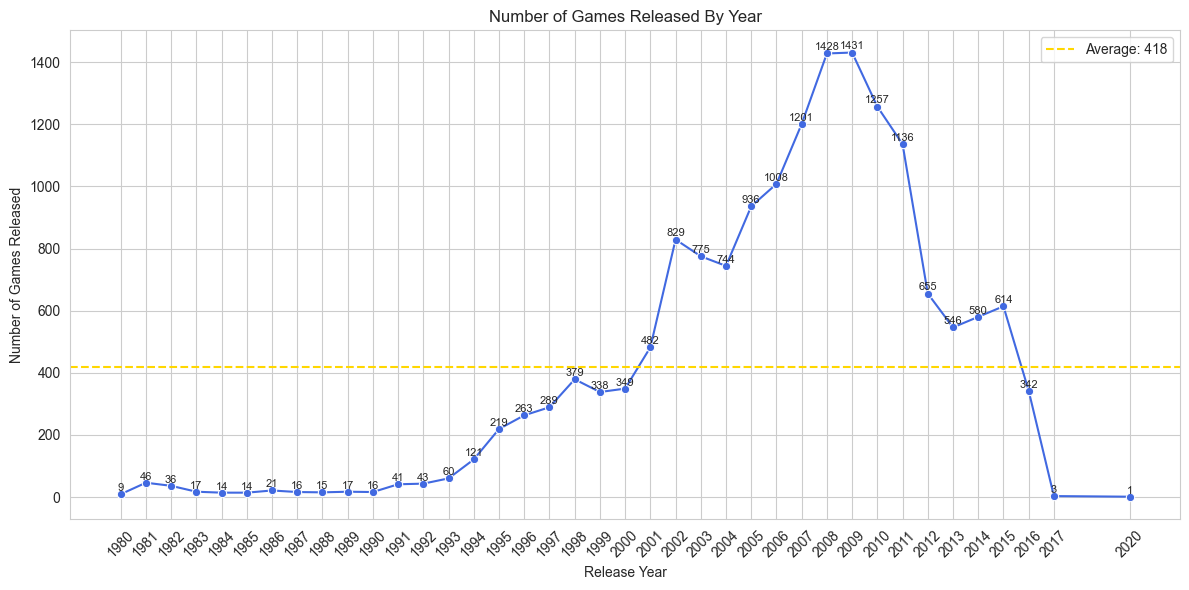

In [8]:
# Group by year and count number of games
yearly_counts = video_games.groupby('Year')['Name'].count().reset_index(name='Game_Count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts,
             x='Year',
             y='Game_Count',
             marker='o',
             color='royalblue')
avg = yearly_counts['Game_Count'].mean()
plt.axhline(avg, color='gold', linestyle='--', label=f"Average: {avg:.0f}")

for x, y in zip(yearly_counts['Year'], yearly_counts['Game_Count']):
    plt.text(x, y + 10, str(y), ha='center', fontsize=8)

plt.title("Number of Games Released By Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.legend()
plt.xticks(yearly_counts['Year'], rotation=45)
plt.tight_layout()
plt.savefig("assets/game_releases_over_year", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
From the mid-90s to around 2010, the number of games released surged dramatically, especially in 2008 and 2009 with over 1440 titles each year. This decade represents the industry's golden era, boosted by the success of consoles like PS2，Wii, and Xbox 360. However, post-2010, there is a sharp decline. By 2016, releases dropped to 342, and from 2017, the numbers fall off a cliff — nearly zero.

##### What it means
* The 2000s were a boom period for console gaming.
* After 2010, the shift to mobile and digital platforms likely reduced traditional game releases.
* The extremely low numbers after 2016 are likely because of dataset limitations, not an actual industry crash.

#### Number of Games Released By Genre, Publisher and Platform

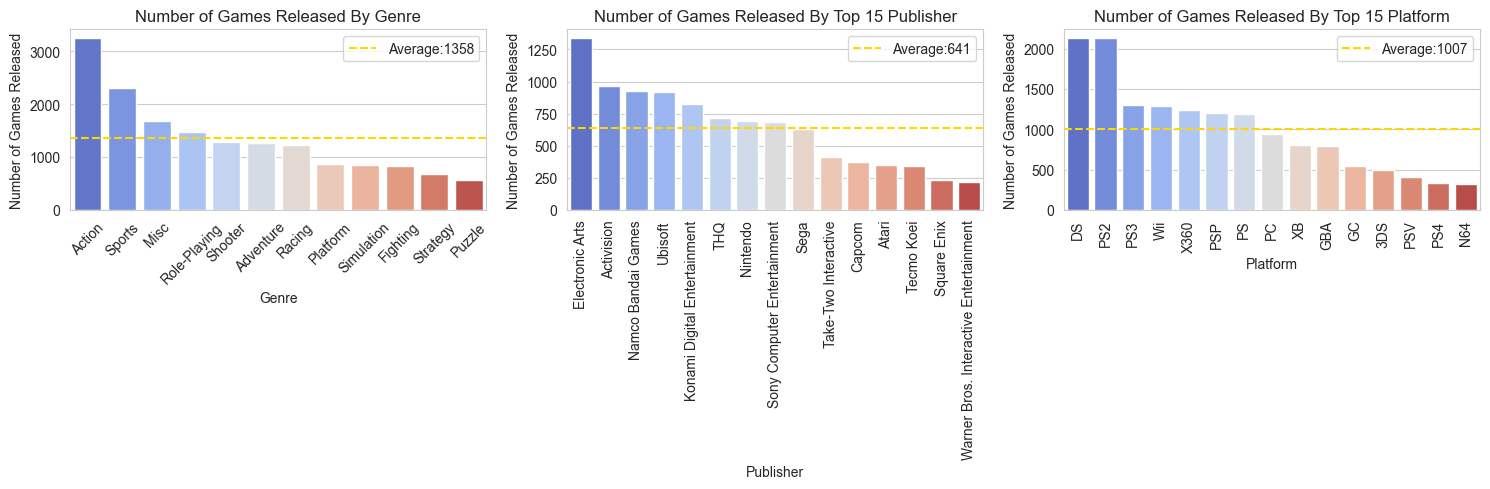

In [9]:
plt.figure(figsize=(15, 5))

categories = [
    ('Genre', 'Number of Games Released By Genre', 0),  # 0 = show all
    ('Publisher', 'Number of Games Released By Top 15 Publisher', 15),
    ('Platform', 'Number of Games Released By Top 15 Platform', 15)
]

for i, (genre, title, top_n) in enumerate(categories, 1):
    plt.subplot(1, 3, i)
    counts = video_games[genre].value_counts()
    if top_n > 0:
        counts = counts.head(top_n)

    sns.countplot(data=video_games, x=genre, order=counts.index, palette='coolwarm')

    avg = counts.mean()
    plt.axhline(avg, color='gold', linestyle='--', label=f'Average:{avg:.0f}')

    plt.title(title)
    plt.xlabel(genre)
    plt.ylabel('Number of Games Released')
    plt.xticks(rotation=45 if genre == 'Genre' else 90)
    plt.legend()

plt.tight_layout()
plt.savefig("assets/game_releases_by_genre_publisher_platform", dpi=300, bbox_inches='tight')
plt.show()


##### What the data shows
Across genre, publisher, and platform, we see clear patterns in where the industry focused its efforts, and where opportunities might lie.
- **Action** and **Sport** games dominate the market, which Action surpassing **3000** titles.
- On the publisher side, **EA**, **Activision**, and **Namco Bandai** top the charts with high release volumes.
- In terms of platforms, the **Nintendo DS** and **PlayStation 2** stand out with over 2000 releases each.

##### What it means
- The industry's core production volume revolves around Action/Sports genres and a few powerhouse publishers and platforms.
- High quantity doesn't mean high quality. Publishers like **Nintendo** and **Square Enix**, though lower in release count, often produce breakout games.
- Less popular genres like Puzzle or Strategy give **more room** for fresh ideas and breakout games.

##### Recommendation
- **Action/Sports** remain safe bets for reach, but watch for oversaturation.
- Evaluate publisher strategies **not just by how much they release, but by impact per title**.
- For future investment, look for platforms that show a **strong track record of long-term developer support and user engagement**

### Game Sales Analysis

#### Game Sales by Year

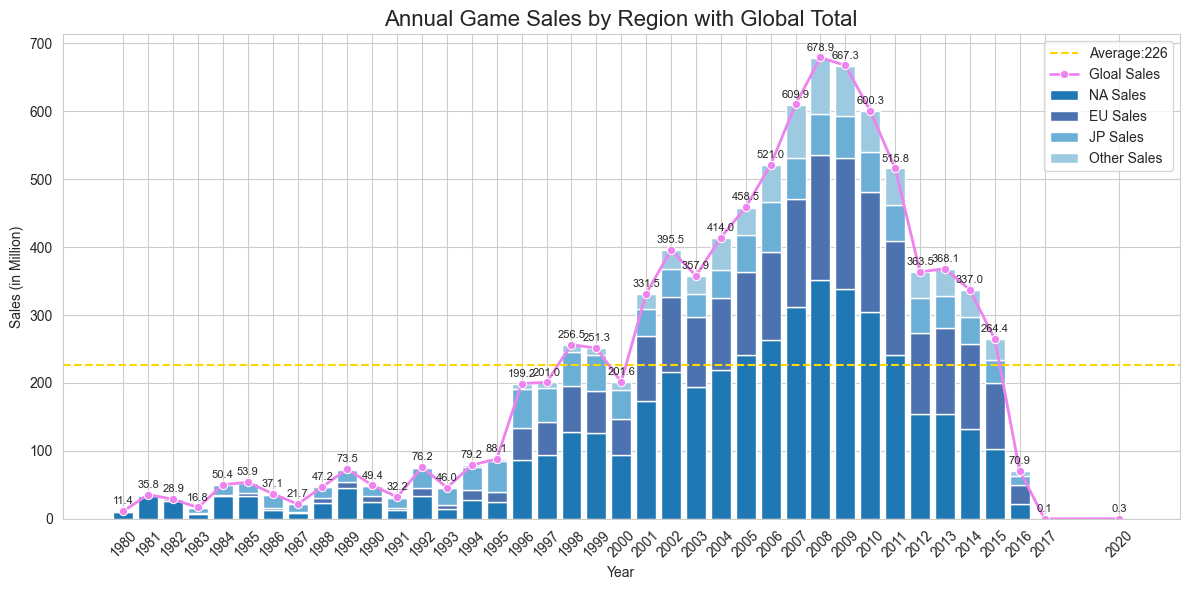

In [10]:
# Aggregate sales by region per year
sales_by_year = video_games.groupby('Year')[
    ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

# Create list for each region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# Create list for colors
colors = ['#1f77b4', '#4c72b0', '#6baed6', '#9ecae1']

bottom = [0] * len(sales_by_year)

plt.figure(figsize=(12, 6))

for region, color in zip(regions, colors):
    plt.bar(
        sales_by_year['Year'],
        sales_by_year[region],
        bottom=bottom,
        label=region.replace("_", " "),
        color=color
    )
    bottom = bottom + sales_by_year[region]

# Calculate average global sales
avg_global = sales_by_year['Global_Sales'].mean()
plt.axhline(avg_global, linestyle='--', color='gold', label=f'Average:{avg_global:.0f}')

sns.lineplot(data=sales_by_year,
             x='Year',
             y='Global_Sales',
             color='violet',
             marker='o',
             linewidth=2,
             label='Gloal Sales')

for x, y in zip(sales_by_year['Year'], sales_by_year['Global_Sales']):
    plt.text(x, y + 10, str(round(y, 1)), ha='center', fontsize=8)

plt.title("Annual Game Sales by Region with Global Total", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Sales (in Million)")
plt.xticks(sales_by_year['Year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("assets/sales_over_year", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This chart shows global game sales over time, broken down by region, and with the pink line showing total global sales each year.
- Global sales **reached peak in 2008 at nearly 679 million dollars**, followed closely by 2009
- The period from **2005 to 2011** was the industry's golden age, with sustained high performance across all regions.
- Since 2012, there has been a **steady decline**, dropping to just 70 million dollars by 2016
- After 2017, sales in the dataset virtually disappear — likely due to missing or incomplete records.

##### What it means
- The boom period likely aligns with the success of consoles like the Wii, Xbox 360, and PS2.
- **North America** consistently leads in total sales, but **Europe and Japan** make up a significant share, especially during the peak years.
- The dramatic drop post-2011 suggests either an industry shift - such as the rise of digital/mobile platforms, or a gap in the dataset that excludes newer channels.

##### Recommendation
- Focus on **2000-2015** as the most complete and insightful sales window.
- **North America** remains a key market, but don't overlook **Europe and Japan**, which show great potential for growth.
- Treat the post-2016 figures with caution. They reflect dataset limitations, not necessarily market collapse.

#### Global Sales By Genre, Publisher and Platform

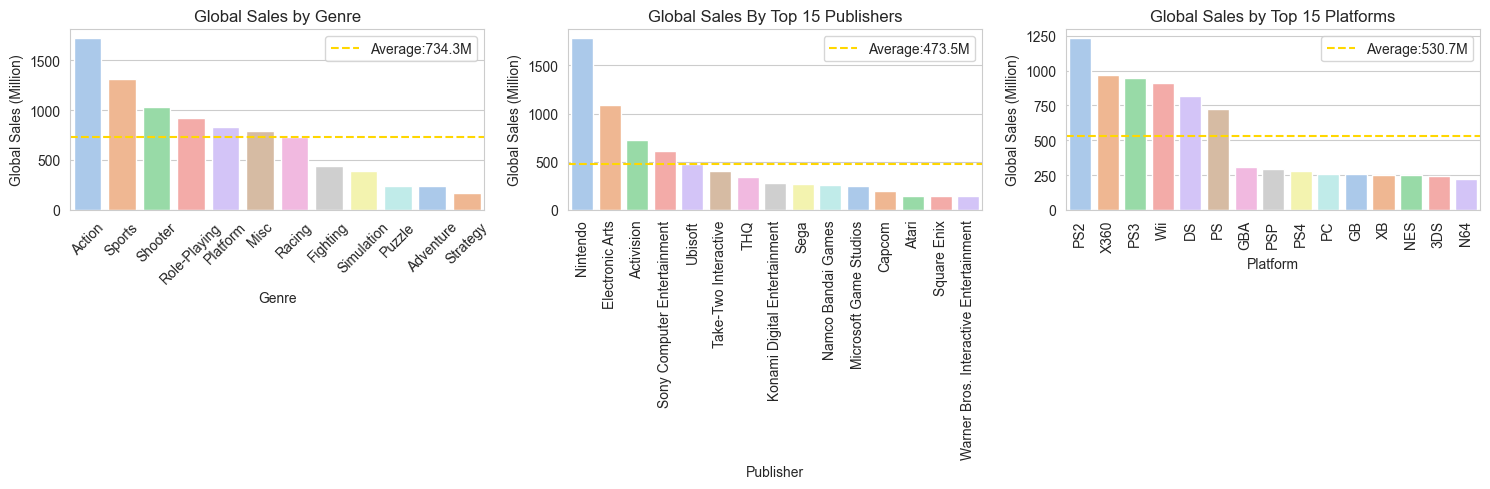

In [11]:
categories = [
    ('Genre', 'Global Sales by Genre', 0),  # 0 = show all
    ('Publisher', 'Global Sales By Top 15 Publishers', 15),
    ('Platform', 'Global Sales by Top 15 Platforms', 15)
]

plt.figure(figsize=(15, 5))

for i, (column, title, top_n) in enumerate(categories, 1):
    sales = video_games.groupby(column)['Global_Sales'].sum().sort_values(ascending=False).reset_index(
        name='Total_Sales')

    # limit to Top N if specified
    if top_n > 0:
        sales = sales.head(top_n)

    plt.subplot(1, 3, i)
    sns.barplot(data=sales, x=column, y='Total_Sales', palette='pastel')

    avg = sales['Total_Sales'].mean()
    plt.axhline(avg, color='gold', linestyle='--', label=f'Average:{avg:.1f}M')

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Global Sales (Million)')
    plt.xticks(rotation=45 if column == 'Genre' else 90)
    plt.legend()

plt.tight_layout()
plt.savefig("assets/sales_by_genre_publisher_platform", dpi=300, bbox_inches='tight')
plt.show()


##### What the data shows
This graph highlights where the revenue is coming from across genres,publishers, and platforms.
- **Action** games lead global sales, followed by **Sports and Shooter**
- In terms of publishers, **Nintendo** takes the top spot in global sales, with **EA and Activision** right behind.
- **PlayStation 2** dominates the platform space, followed closely by **Xbox 360 and PS3**

##### What it means
- Action and Sports are not only popular, they but also **drive the business**. These genres hold a significant market share and have a strong player base.
- Well-known publishers like **Nintendo, EA and Activision** are have strong brand recognition and significant influence in the gaming industry.
- The PS2's sales dominance shows the power of a long console lifecycle and strong third-party support.

##### Recommendation
- Consider focusing on Action and Sports genres to **satisfy high-volume demand**.
- For strategic partnerships, Nintendo and EA are **the industry titans**. It should prioritize collaboration or alignment with their ecosystems.
- Top-selling platforms like PS2, Xbox 360, and Wii show that **a large player base and a well-established platform** are key drivers of game sales.

#### Regional Sales Contribution to Global Sales

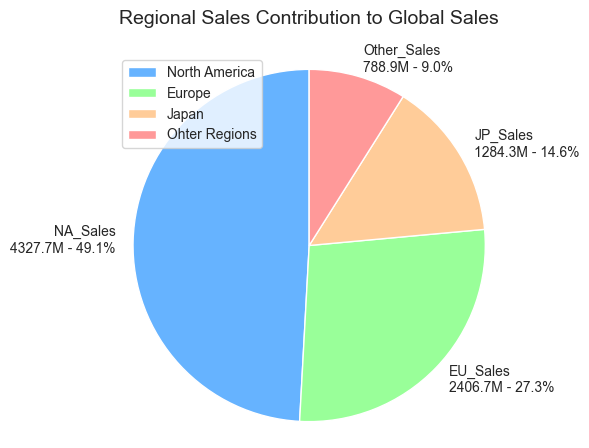

In [12]:
# Define region column names
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Calculate each region's contribution and total global sales
global_sales = video_games['Global_Sales'].sum()
region_sales = video_games[regions].sum()
region_ratio = region_sales / global_sales * 100

# create a pie chart
plt.figure(figsize=(5, 5))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# Labels include region name, actual sales, and percentage
labels = [
    f'{region}\n{sales:.1f}M - {percent:.1f}%'
    for region, sales, percent in zip(regions, region_sales, region_ratio)
]

plt.pie(
    region_ratio,
    labels=labels,
    startangle=90,
    colors=colors
)

plt.title("Regional Sales Contribution to Global Sales\n", fontsize=14)
plt.axis('equal')

plt.legend(
    labels=['North America', 'Europe', 'Japan', 'Ohter Regions'],
    loc='upper left'
)
plt.savefig("assets/regional_sales_contribution", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This pie chart gives us a clear view on how is the global game sales distribution across regions:
- **North America** leads by a large margin, accounting for **49.1%** of total sales.
- **Europe** is the second-largest market at **27.3%**
- **Japan** contributes a significant **14.6%**, which is impressive given its smaller population.
- The rest of the world makes up the remaining **9%**

##### What it means
- Nearly **half of all global game sales happen in North America**. This makes it the largest market for publishers.
- Europe represents **over a quarter of global revenue**, which is not to be underestimated.
- Japan remains a highly influential market, particularly for genres like RPGs and handheld games.
- Other regions suggest growing opportunities in **emerging markets** like Latin America and Asia.

##### Recommendation
- **Prioritize North America and Europe** as primary markets for launch and partnership.
- **Consider Japan as the first choice** if the game fits the cultural or genre preferences, especially RPGs, simulation, or family titles.
- **Keep an eye on growth potential in other regions**.

#### Distribution of Global Sales

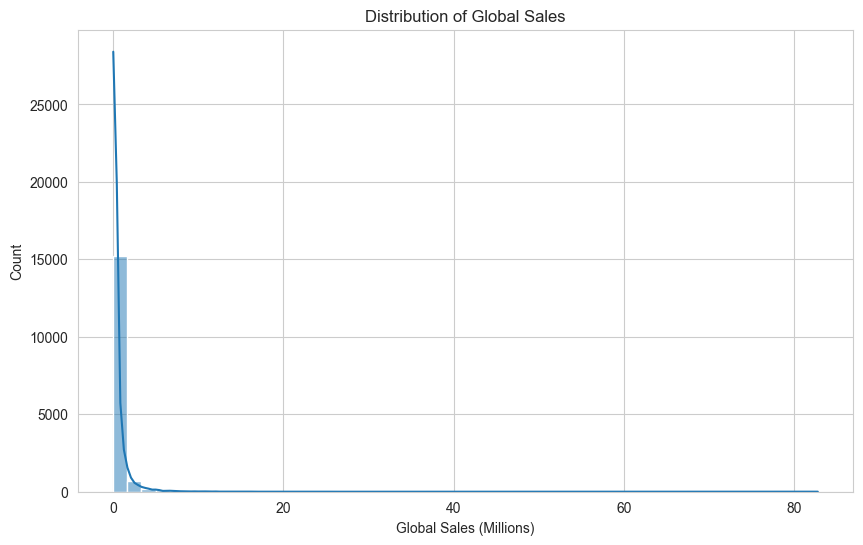

In [13]:
# Filter out records with zero value to avoid chart distortion
video_games = video_games[video_games['Global_Sales'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(data=video_games['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.savefig("assets/global_sales_distribution", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
The histogram of global sales shows that overall distribution of game sales worldwide. As we can see, the majority of games sell very few copies, while only a small number achieve massive sales,resulting in a right-skewed distribution.

##### What it means
- This is a classic **long-tail market**. A small number of games account for a large share of total sales.
- Most games fail to gain significant traction in the market, resulting in only modest sales performance.
- Success in the game industry is not **evenly distributed**, it's winner-takes-most.

##### Recommendation
- **Don't bet everything on one title**. Spread risk across multiple projects, knowing only a few may break out.
- **Invest in quality and IP development**.
- **Support smaller titles with strong marketing to give them an opportunity to stand out in the crowded market**.

#### Distribution of Global Sales by Genre, Publisher, and Platform

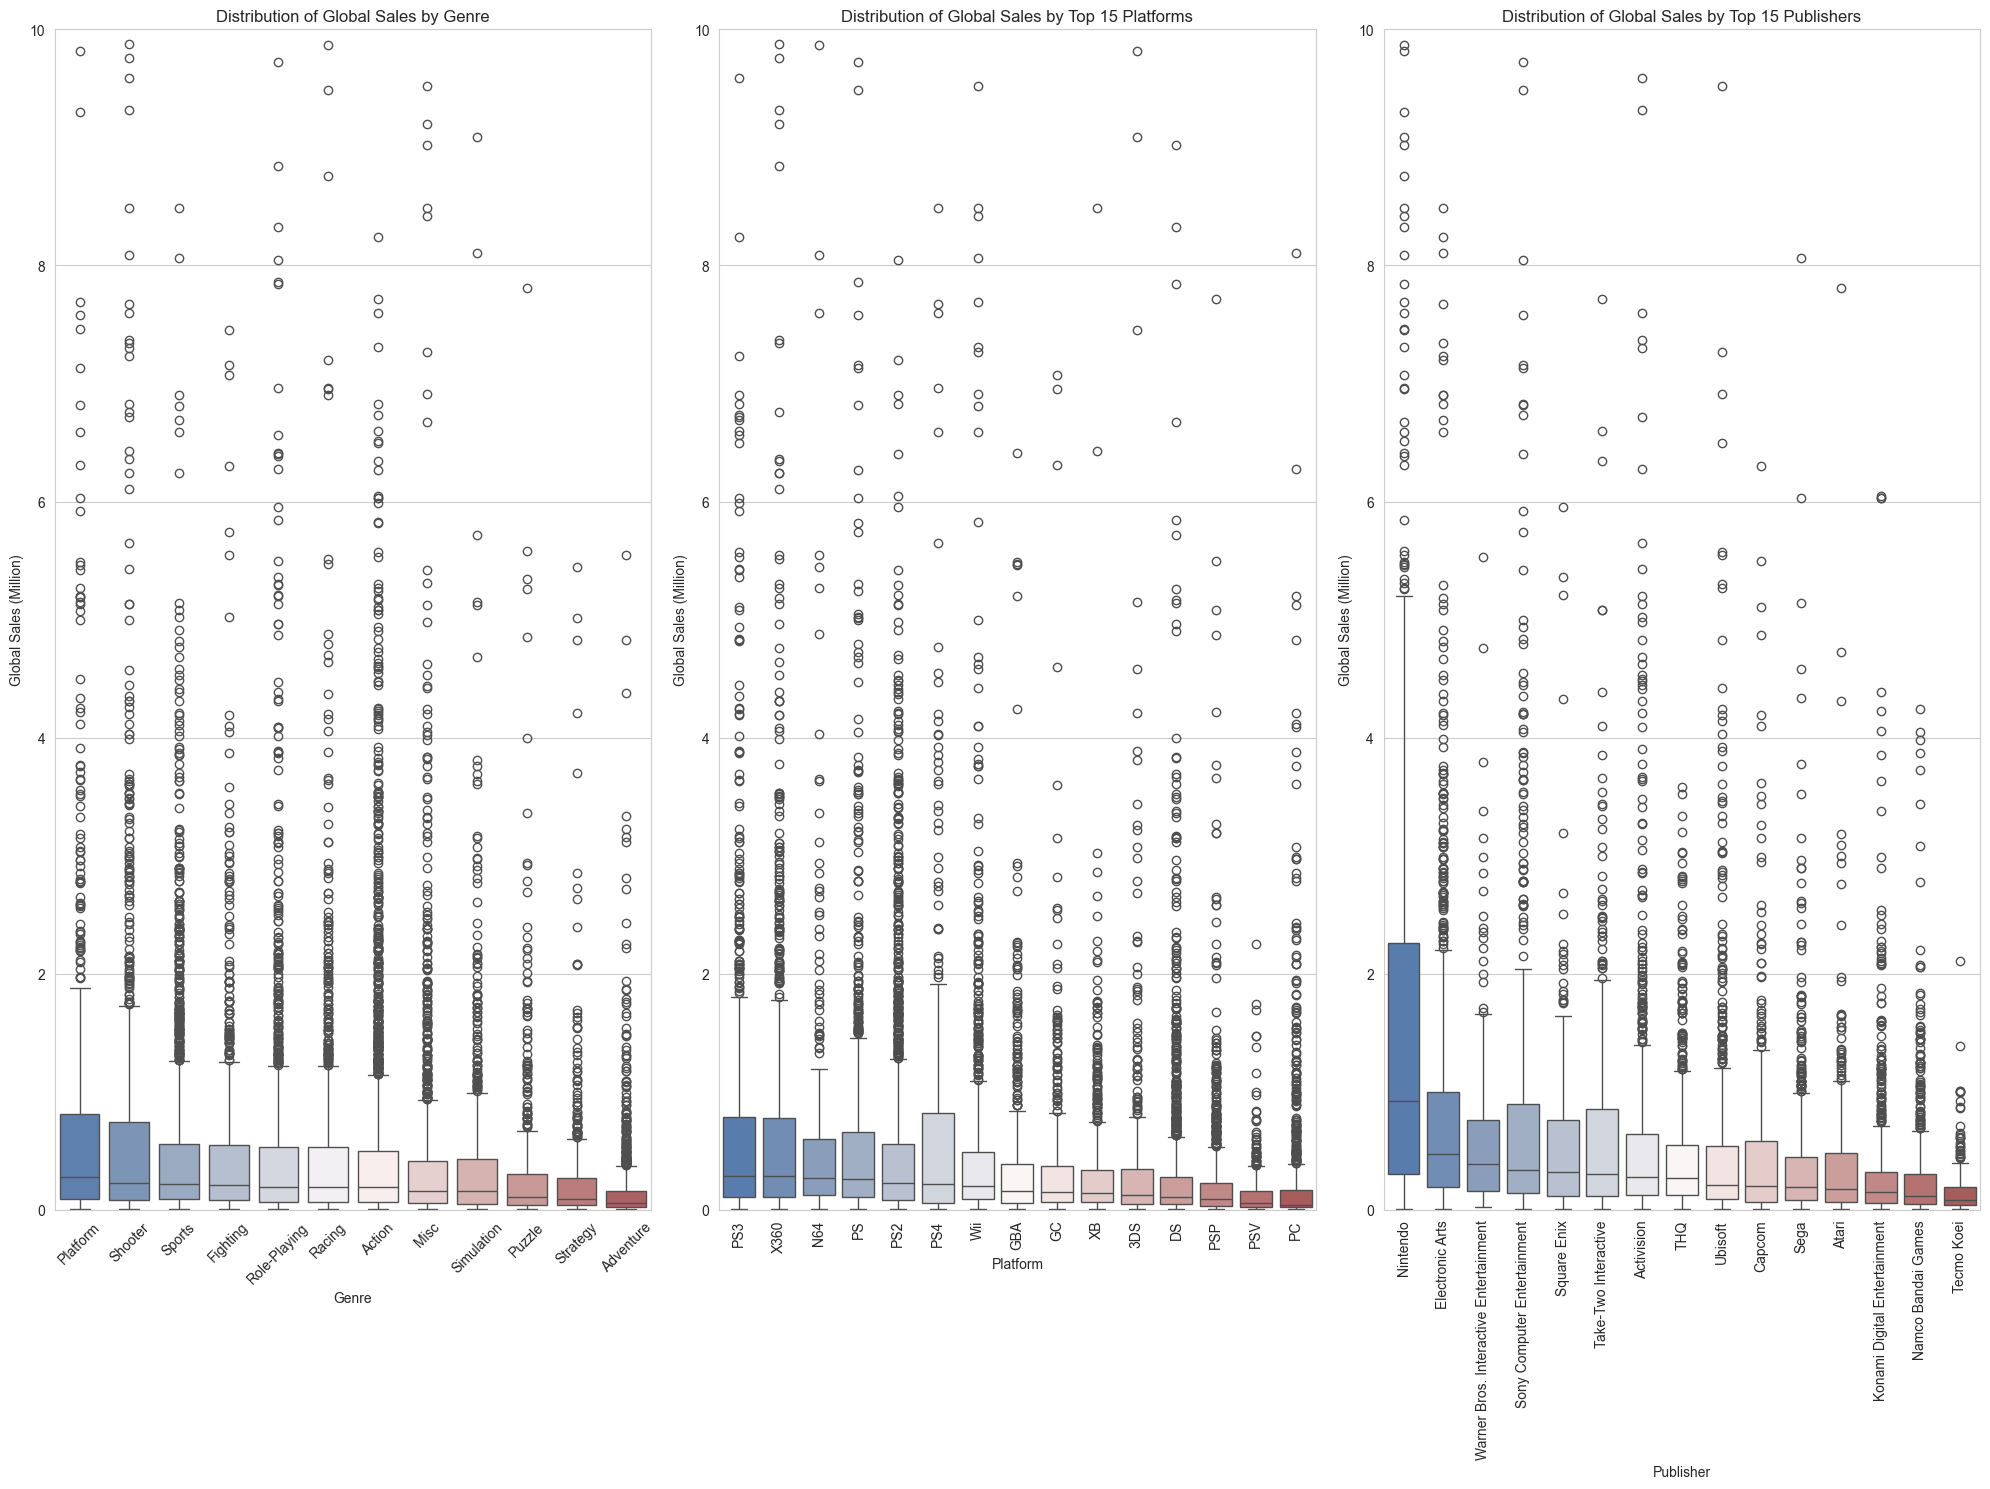

In [14]:
# Function for Sorting by Median
def get_median_sorted_order(df, group_col, value_col):
    median_order = (
        df.groupby(group_col)[value_col]
        .median()
        .sort_values(ascending=False)
        .index
    )
    return median_order


# Filter out records with zero value to avoid chart distortion
video_games = video_games[video_games['Global_Sales'] > 0]

# Top 15 platforms and publishers
top_platforms = video_games['Platform'].value_counts().head(15).index
top_publishers = video_games['Publisher'].value_counts().head(15).index
plot_settings = [
    {
        'title': 'Distribution of Global Sales by Genre',
        'col': 'Genre',
        'data': video_games
    },

    {
        'title': 'Distribution of Global Sales by Top 15 Platforms',
        'col': 'Platform',
        'data': video_games[video_games['Platform'].isin(top_platforms)]
    },

    {
        'title': 'Distribution of Global Sales by Top 15 Publishers',
        'col': 'Publisher',
        'data': video_games[video_games['Publisher'].isin(top_publishers)]
    }
]

plt.figure(figsize=(20, 15))
for i, setting in enumerate(plot_settings, 1):
    col = setting['col']
    data = setting['data']
    order = get_median_sorted_order(data, col, 'Global_Sales')

    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=col, y='Global_Sales', order=order, palette='vlag')
    plt.title(setting['title'])
    plt.xlabel(col)
    plt.ylabel('Global Sales (Million)')
    plt.ylim(0, 10)
    plt.xticks(rotation=45 if col == 'Genre' else 90)

plt.tight_layout()
plt.savefig("assets/global_sales_distribuiton_by_genre_publisher_platform", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This set of boxplots gives us a comparison of how global game sales are distributed across genres, platforms, and publishers.
1. **By Genre:**
    - **Platform and Shooter** games tend to have higher median sales and wider ranges. Genres like **Adventure, Strategy, and Puzzle** have lower sales and fewer standouts.
    - **Fighting and RPGs** show more volatility with clear outliers.
2. **By Platform:**
    - Consoles like **PS3, X360, and N64** show a wider sales spread and more outliers.
    - **PSV and PC** have narrower boxes, implying tighter and often lower sales ranges.
3. **By Publisher:**
    - **Nintendo** leads not just in total sales, but also in median and upper-range performance.
    - **EA, Sony, and Square Enix** also show consistent high-sellers.
    - **Tecmo Koei and Namco Bandai** show smaller spreads and fewer standout titles.

##### What it means
- Success is not **equally distributed**. Certain genres and platforms generate higher sales and some publishers have built a track record of big hits.
- Outliers highlight the importance of "breakout titles". One or two mega-hits can define a publisher's entire portfolio.

##### Recommendation
- Focus on genres and platforms with **higher median sales**.
- **Study publishers with wide spread and strong outliers**. Their strategies can offer key learning points.
- For newer studios, **targeting niche genres with tighter competition** may still generate considerable returns.

Through the above analysis, we gain a more comprehensive understanding of the characteristics and trends of the video game market, proving valuable data support for decision-making.

**Next, I will dive deeper into the data to uncover more valuable insights.**

# Regional Sales and Preference Analysis

### Each Regional Sales by Genre

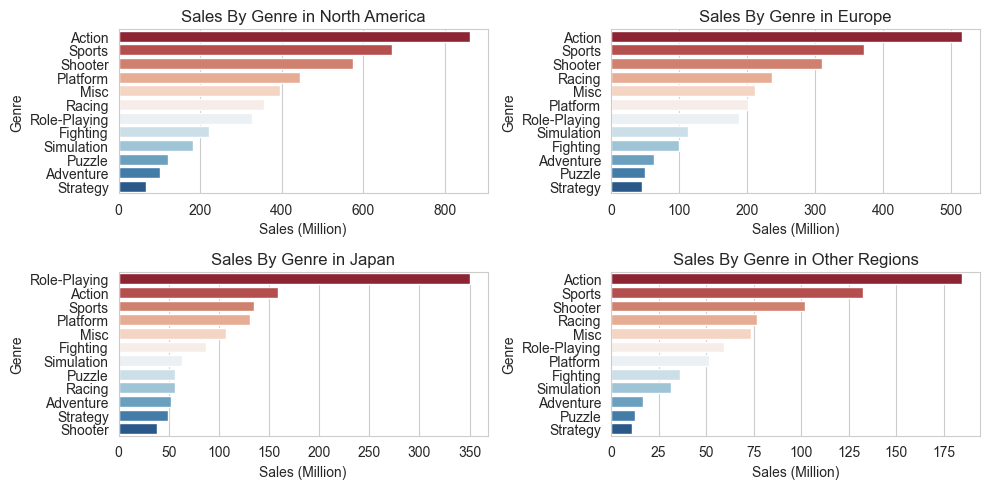

In [15]:
regions = {
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other Regions'
}

plt.figure(figsize=(10, 5))

for i, (region, region_name) in enumerate(regions.items(), 1):
    genre_sales = video_games.groupby('Genre')[region].sum().sort_values(ascending=False)

    plt.subplot(2, 2, i)

    sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='RdBu')

    plt.title(f'Sales By Genre in {region_name}')
    plt.xlabel('Sales (Million)')
    plt.ylabel('Genre')

plt.tight_layout()
plt.savefig("assets/regional_sales_by_genre", dpi=300, bbox_inches='tight')
plt.show()


##### What the data shows
These four horizontal bar charts show what genres people like across regions:
- **North America, Europe, and other region** have similar preferences: **Action, Sports, and Shooter**
- **Japan** stands out with a preference for **Role-Playing Games**.

##### What it means
- **Western markets** (NA&EU) show a strong preference for fast-paced, competitive genres like Shooter and Sports.
- In **Japan**, players are big fans of games with strong stories and memorable characters, that's why RPGs do so well there.
- Although **other regions** follow global trends in genre preference, there is potential for growth, particularly in genres that are better adapted to local tastes.

##### Recommendation
- **Prioritize** Action/Sports in NA&EU, and RPGs in Japan.
- For emerging regions, **use global hits as an entry point**, but explore local player behavior for deeper market development.

### Each Regional Sales by Top 10 Platforms

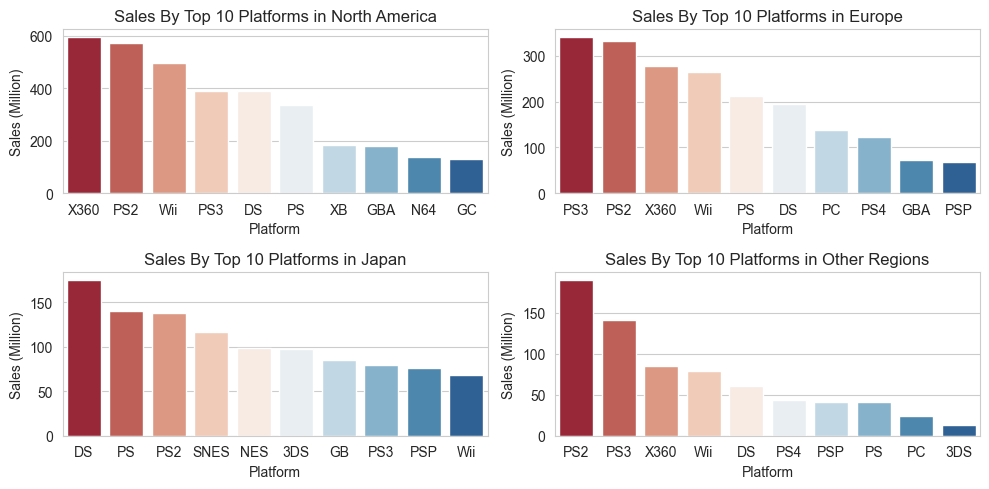

In [16]:
regions = {
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other Regions'
}

plt.figure(figsize=(10, 5))

for i, (region, region_name) in enumerate(regions.items(), 1):
    genre_sales = video_games.groupby('Platform')[region].sum().sort_values(ascending=False).head(10)

    plt.subplot(2, 2, i)

    sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='RdBu')

    plt.title(f'Sales By Top 10 Platforms in {region_name}')
    plt.xlabel('Platform')
    plt.ylabel('Sales (Million)')

plt.tight_layout()
plt.savefig("assets/regional_sales_by_platform", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This comparison of the top 10 platforms across regions reveals strong bias towards in console usage:
- **North America** is dominated by **Xbox 360, PS2, and Wii**.
- In **Europe, PlayStation consoles take a lead**, especially **PS3 and PS2**.
- **Japan** shows a clear preference in handheld and traditional Nintendo platforms, led by the **DS, PS1, PS2, and SNES. 3DS, PSP and GB are also strong**.
- In **other regions**, **PS2 and PS3** dominated, followed by **Xbox 360 and Wii**, showing more alignment with global trends but with lower total sales.

##### What it means
- **PlayStation has strong appeal among the world**.
- **Xbox has a solid presence in North America**.
- **Nintendo's handheld platforms** perform well in **Japan**, reflecting the country's preference for portable gaming.
- **Other regions** generally follow the Western trend but at a smaller scale.

##### Recommendation
- **Prioritize PlayStation for cross-regional releases**.
- **Handheld platforms or Nintendo consoles are the top choice** if launches games in **Japan**, especially for genres like RPGs.
- For North America, **Xbox is a key platform for action-heavy and online multiplayers games**.

### Regional Sales Distribution of Top 10 Publishers

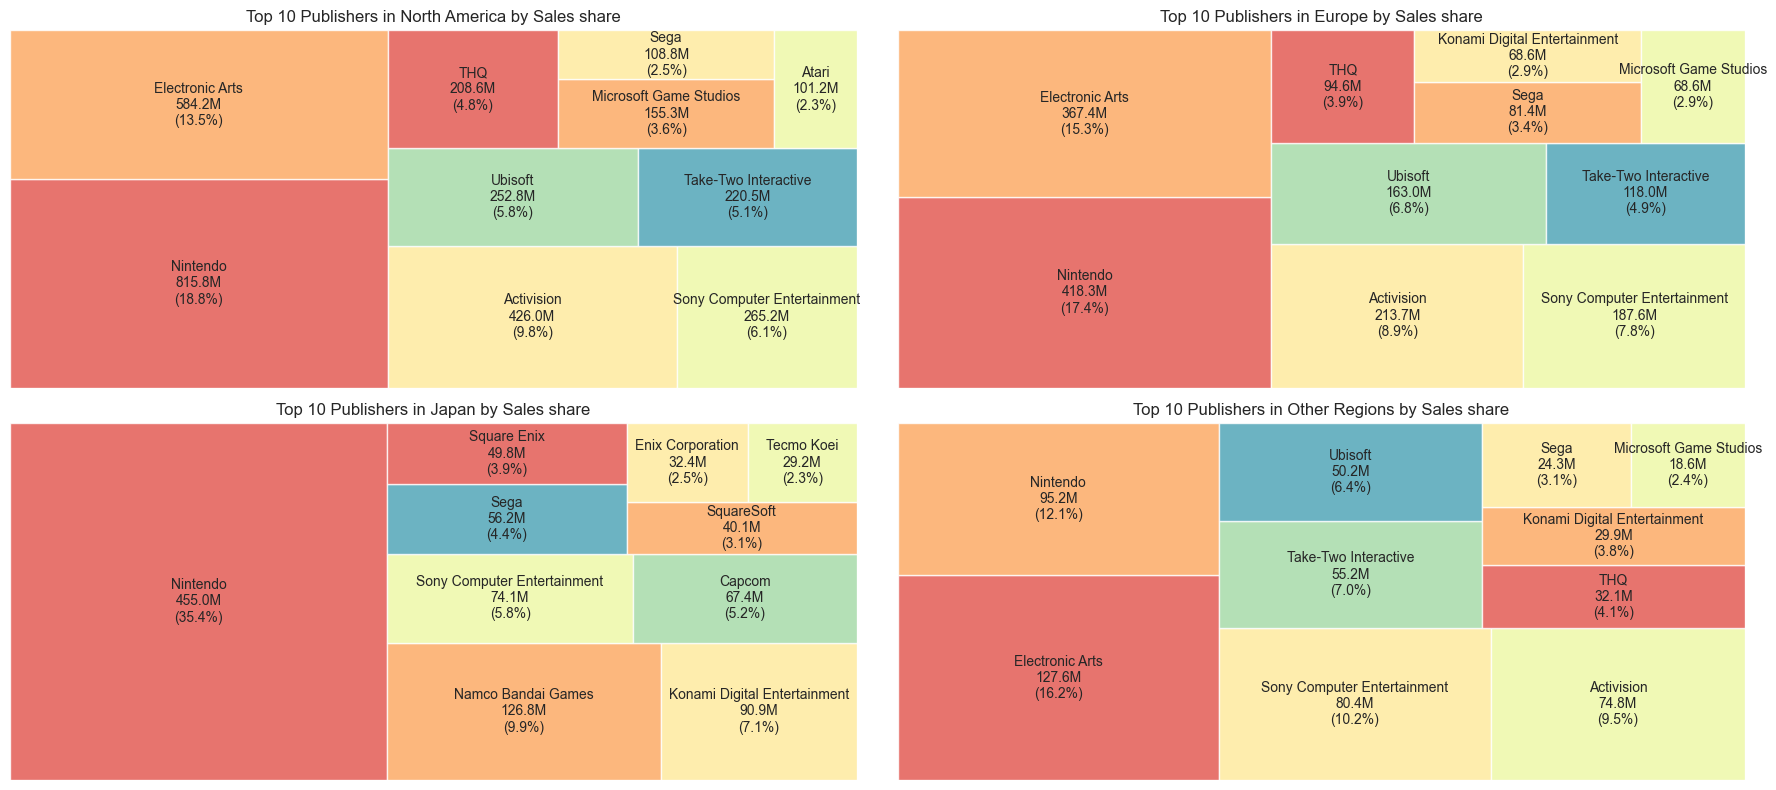

In [17]:
import squarify

regions = {
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'JP_Sales': 'Japan',
    'Other_Sales': 'Other Regions'
}

plt.figure(figsize=(18, 8))

for i, (region, region_name) in enumerate(regions.items(), 1):
    region_data = (
        video_games
        .groupby('Publisher')[region]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    total_sales = video_games[region].sum()
    sizes = region_data.values
    labels = [
        f'{publisher}\n{sales:.1f}M\n({sales / total_sales:.1%})'
        for publisher, sales in zip(region_data.index, region_data.values)
    ]

    plt.subplot(2, 2, i)
    squarify.plot(sizes=sizes,
                  label=labels,
                  alpha=0.8,
                  color=sns.color_palette('Spectral')
                  )
    plt.title(f'Top 10 Publishers in {region_name} by Sales share')
    plt.axis('off')

plt.tight_layout()
plt.savefig("assets/regional_sales_by_publisher", dpi=300, bbox_inches='tight')
plt.show()


##### What the data shows
This set of treemaps illustrates how publisher sales are distributed across regions:
1. **North America**
    - **Nintendo (18.8%)** and **Electronic Arts (13.5%)** lead the market.
    - Other strong players include **Activision, Ubisoft, and Sony**.
    - The NA market shows a relatively diverse distribution, with several publishers holding meaningful shares.
2. **Europe**
    - Similar to NA, **Nintendo and EA** take the top two spots with **17.4% and 15.3%** respectively.
    - **Sony, Ubisoft, and Activision** maintain strong regional presence.
    - Notably, Japanese publishers like **Konami and Sega** are also present, though with smaller shares.
3. **Japan**
    - **Nintendo** dominates with **35.4%**, far ahead of the rest.
    - Japanese publishers such as **Namco Bandai, Konami, Capcom, and Square Enix** make up most of the top 10.
    - Western publishers have minimal presence, reflecting Japan’s strong domestic market focus.
4. **Other Regions**
    - The market is more evenly split, led by **EA (16.2%) and Nintendo (12.1%)**, followed by **Sony, Ubisoft, and Take-Two**.
    - Regional distribution here is similar to global trends but with smaller numbers.

##### What it means
- **Nintendo is the only publisher with strong presence in all four regions**, especially in Japan.
- **EA has major influence in the West**.
- **Japanese publishers are highly localized**, with most of their sales coming from Japan itself.
- **Other regions show more balanced competition**, signaling growth opportunities.

##### Recommendation
- **Collaborate with regionally dominant publishers** for stronger market access.
- When planning a global rollout, **focus on publishers with proven multi-region performance**, such as **Sony, Ubisoft, and Nintendo**.

# Publisher Performance Analysis

### Top 15 Publisher Global Market Share Distribution

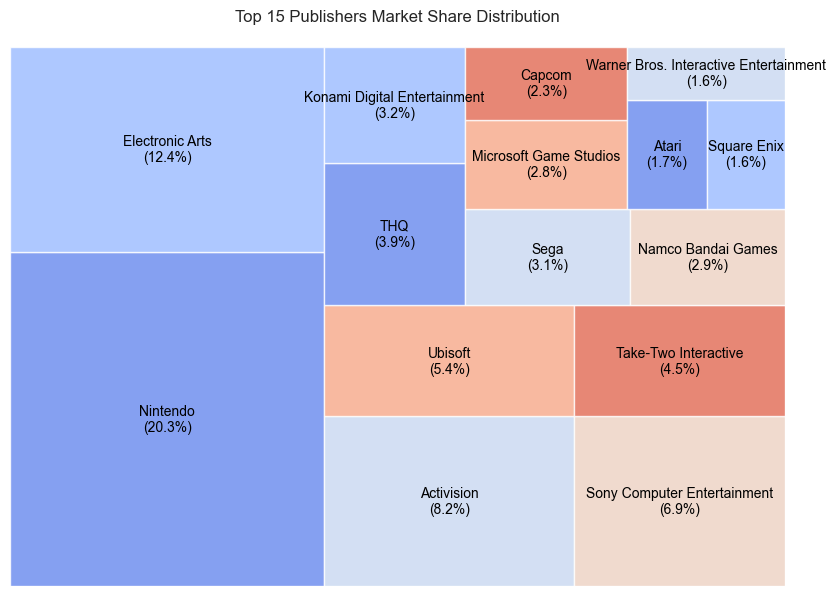

In [18]:
import squarify

publisher_sales = (
    video_games.groupby('Publisher')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

total_sales = video_games['Global_Sales'].sum()
sizes = publisher_sales.values

labels = [
    f'{publisher}\n({sales / total_sales:.1%})'
    for publisher, sales in zip(publisher_sales.index, publisher_sales.values)
]

plt.figure(figsize=(10, 7))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette('coolwarm'),
    alpha=0.8,
    text_kwargs={'color': 'black'}
)

plt.axis('off')
plt.title(f'Top 15 Publishers Market Share Distribution\n')
plt.savefig("assets/top15_publishers_market_share_distribution", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
The treemap gives a clear, visual look at how market share is split among publishers:
- **Nintendo** leads the pack by a wide margin, accounting for **20.3%** of all global game sales.
- **EA (12.4%) and Activision (8.2%)** follow, making up a large portion of Western market share.
- **Sony** also holds a strong global position at **6.9%**, followed by **Ubisoft (5.4%), Take-Two (4.5%)**, and others.
- The remaining publishers each hold between 1–4%, reflecting a long tail of mid-tier contributors.

##### What it means
- **The market is highly concentrated at the top**. Nintendo, EA, and Activision alone account for more than 40% of total global sales.
- Nintendo's dominance shows its success in both software and hardware ecosystems.
- The presence of both **Western and Japanese publishers** shows the global nature of the market.

##### Recommendation
- **Collaborating with leading publishers** such as Nintendo, EA, or Sony offers maximum reach and commercial success.
- **Mid-size publishers** like Ubisoft and Take-Two are strong in specific genres or regions, which makes them ideal for co-publishing or niche market entry.

### Top 15 Publishers by Average Game Sales

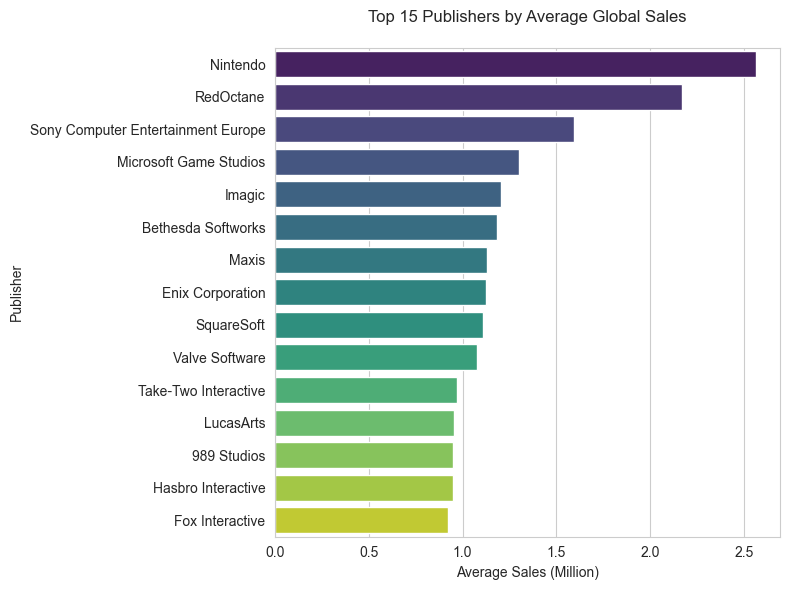

In [19]:
# Aggregate total sales and number of games for each publisher

publisher_group = video_games.groupby('Publisher').agg({
    'Global_Sales': ['sum', 'count']
})

# Calculate average sales 
publisher_group.columns = ['Total_Sales', 'Game_Count']
publisher_group['Average_Sales'] = publisher_group['Total_Sales'] / publisher_group['Game_Count']

# Exclude publishers with very few titles (e.g., 1 or 2) to avoid bias
publisher_group = publisher_group[publisher_group['Game_Count'] >= 3]

# Get Top 15 publishers by average sales
top15_avg_sales = publisher_group['Average_Sales'].sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=top15_avg_sales, x='Average_Sales', y='Publisher', palette='viridis')

plt.title('Top 15 Publishers by Average Global Sales\n')
plt.xlabel('Average Sales (Million)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.savefig("assets/top15_publishers_average_sales", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This chart highlights the top 15 publishers with the highest average global sales per title:
- **Nintendo** is the king in the list with an average of over **2.5 million dollars per gamed**
- Major publishers like **RedOctane, Sony, and Microsoft Game Studios** also perform strongly.

##### What it means
- These publishers release fewer games, but they tend to sell significantly better per game.
- Nintendo's strong IP ecosystem and platform give it a huge advantage in maximizing game performance.

##### Recommendation
- **Track publishers with high average sales** because they are more likely to deliver consistent returns per game.
- For new developers, **aligning with high-average publishers** may provide greater exposure.

### Publisher Performance: Quantity vs Quality

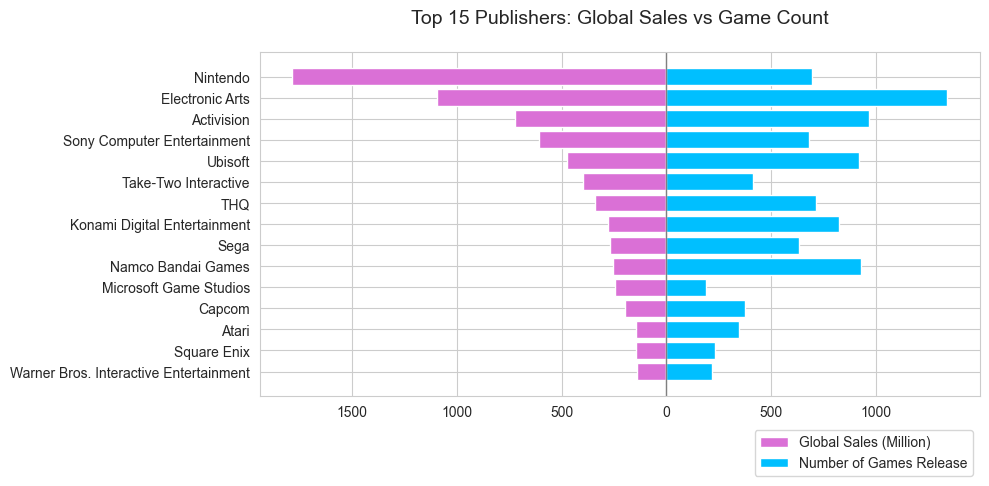

In [20]:
# Create a mirrored bar chart to compare the total sales and number of game released for the Top 15 publishers

# count total sales of Top 15 publishers
publisher_sales = (
    video_games.groupby('Publisher')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

# count number of games Top 15 publishers released
publisher_counts = video_games['Publisher'].value_counts().loc[publisher_sales.index]

plt.figure(figsize=(10, 5))
ax = plt.gca()

y = range(len(publisher_sales))

# left size of bar chart: total sales
ax.barh(y, -publisher_sales.values, color='orchid', label='Global Sales (Million)')

# right size of bar chart: number of games released
ax.barh(y, publisher_counts.values, color='deepskyblue', label='Number of Games Release')

ax.set_yticks(y)
ax.set_yticklabels(publisher_sales.index)
ax.set_xticklabels([f"{abs(int(x))}" for x in ax.get_xticks()])

plt.title("Top 15 Publishers: Global Sales vs Game Count\n", fontsize=14)
plt.legend(bbox_to_anchor=(1, -0.08), ncol=1)

ax.axvline(0, color='gray', linewidth=1)
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("assets/top15_publishers_performance", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This chart compares the total global sales with the number of games released by the publishers:
- **Nintendo** tops in the chart with the **highest total sales**, despite releasing **fewer games** than many of other publishers.
- **EA and Activision** also have strong sales, but it is driven by **high-volume output**.
- **Sony, Take-Two, and Microsoft** balance quantity and revenue effectively.
- **Namco Bandai, Sega, and Konami** appear in the middle tier with a large number of releases but relatively low revenue.

##### What it means
- Nintendo's performance shows that **quality, iconic IPs, and exclusivity** can outperform quantity.
- On the other hand, some publishers rely on **scale and frequency** to maintain market share.
- A few publishers show **lower efficiency** - high output but low sales, suggesting **room to improve product-market fit or brand loyalty**.

##### Recommendation
- **Prioritize partnerships with publishers who show strong sales per title**, not just high output.
- **Nintendo's model** proves that IP strength and platform integration can significantly maximize revenue without relying on volume.
- For high-volume or low efficiency publishers, they should **optimize the product portfolio, which means to reduce weak performers and put more resources into the best-selling series, and shift from quantity to more focused, high-impact content strategies**.

### Sales Trends of the Top 5 Publishers

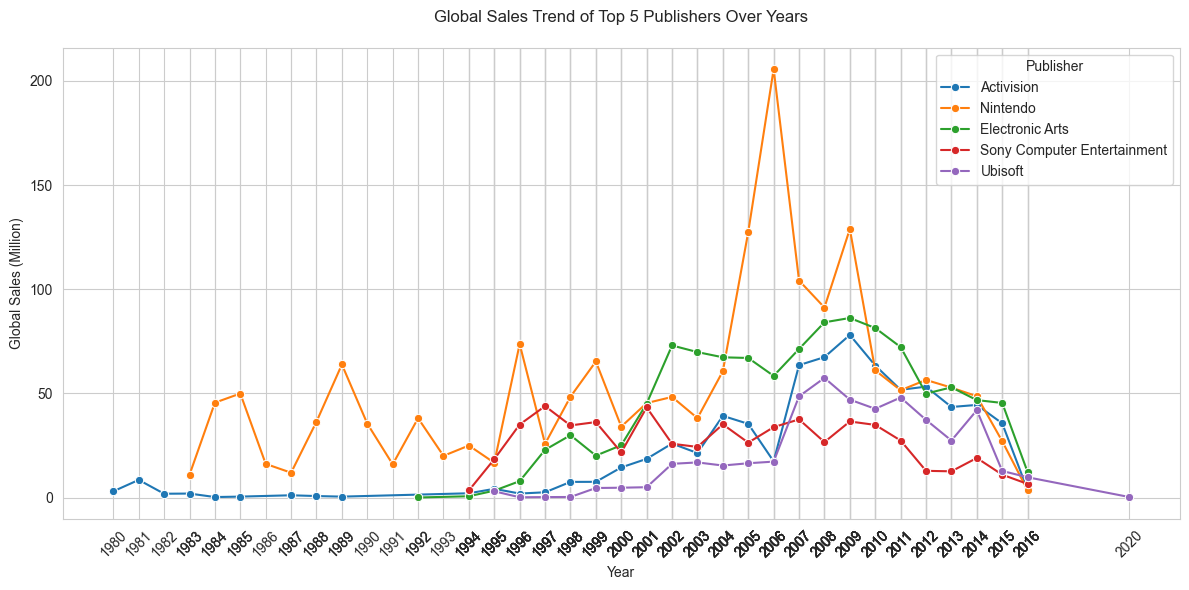

In [21]:
# Get Top 5 publisher by total global sales
top5_publishers = (
    video_games.groupby('Publisher')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the data for these publishers
top5_data = video_games[video_games['Publisher'].isin(top5_publishers)]

# Aggregate by year and publisher
sales_by_year = (
    top5_data
    .groupby(['Year', 'Publisher'])['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Year')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', hue='Publisher', marker='o')

plt.title('Global Sales Trend of Top 5 Publishers Over Years\n')
plt.xlabel('Year')
plt.ylabel('Global Sales (Million)')
plt.xticks(sales_by_year['Year'], rotation=45)
plt.legend(title='Publisher')
plt.tight_layout()
plt.savefig("assets/top5_publishers_sales_trend", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This line chart shows the yearly global sales performance of the top 5 publishers:
- **Nintendo** shows early dominance from the **1980s**, peaking dramatically in **2006** at over **200 million dollars**.
- **EA** experienced steady growth starting in the **2000s** and reached its peak around **2008-2011**.
- **Activision** reached its peak between **2008-2011**.
- **Sony** maintained a relatively stable presence throughout the **2000s**.
- **Ubisoft** grew steadily but with a more modest peak, maintaining consistent mid-level performance across the year.

##### What it means
- Between **2005 and 2011**, many top publishers reached their **peak performance**, likely driven by the success of consoles like the **PS3, Xbox 360, and Wii**.
- **After 2011**, all five publishers experienced a downward trend. It is likely influenced by the industry's **shift toward digital and mobile platforms**, as well as **fewer hit titles and a more crowded market**.
- Nintendo's performance is **unique**. It tends to **grow in waves with each surge closely tied to the success of its hardware platforms**.

##### Recommendation
- Study the **timing of publisher peaks** to understand how platform cycles and hardware launches affect performance.
- Post-2011 decline suggests a **shift in game industry**. Future analysis should incorporate **digital & mobile trends** and **newer platforms** like **Switch and PS4/5**.

# Platform Competitiveness Analysis

### Top 15 Platforms by Global Market Share

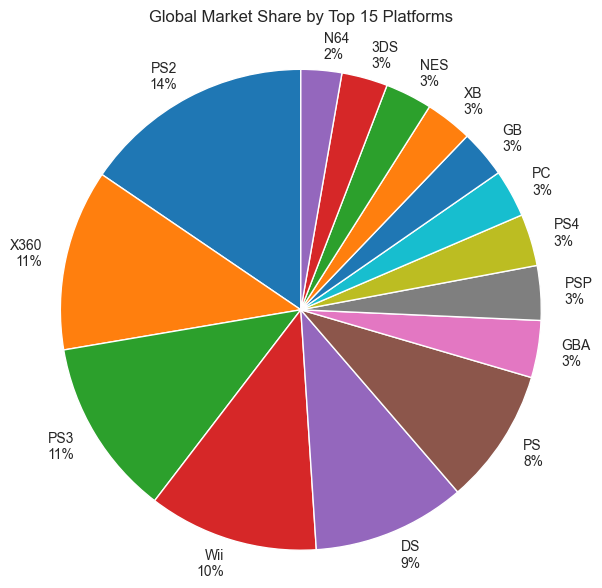

In [22]:
# Get Top 15 platforms by global sales
top15_platforms = (
    video_games.groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

# Calculate total global sales
global_sales = video_games['Global_Sales'].sum()

labels = [
    f'{platform}\n{sales / global_sales:.0%}'
    for platform, sales in zip(top15_platforms.index, top15_platforms.values)
]

plt.figure(figsize=(6,6))
plt.pie(
    top15_platforms,
    labels=labels,
    startangle=90
)

plt.title('Global Market Share by Top 15 Platforms\n')
plt.axis('equal')
plt.tight_layout()
plt.savefig("assets/top15_platform_global_market_share", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This pie chart shows the global market share distribution among the top 15 gaming platforms:
- **PS2 dominates with 14%** of total game sales, followed by **Xbox 360 (11%) and PS3 (11%)**.
- **Wii (10%) and DS (9%)** also hold significant share.
- Other platforms such as **PS, PSP, GBA, PC** each contribute around **3-8%**.
- The remaining platforms **(N64, NES, XB, 3DS)** hold smaller slices **(2-3%)**.

##### What it means
- The **PlayStation brand** (PS1 to PS3) holds a **significant share of the global market, reflecting brand loyalty and ecosystem strength**.
- **Nintendo's hybrid dominance** - both through home consoles (Wii) and handhelds (DS, GBA, 3DS) highlights **the effectiveness of diversified platform strategy**.
- **The strong performance of Xbox 360** shows Microsoft's **successful entry into the console market in the mid-2000s**.
- Platforms with a smaller market share indicate **more niche or regional impact**.

##### Recommendation
- Recognize the strong global performance of **PlayStation consoles**, which makes them ideal for cross-regional releases.
- Considering that **handheld platforms contribute** a large share; mobile and hybrid platforms should be key in future strategies.


### Sales Performance by Platform and Game Genre

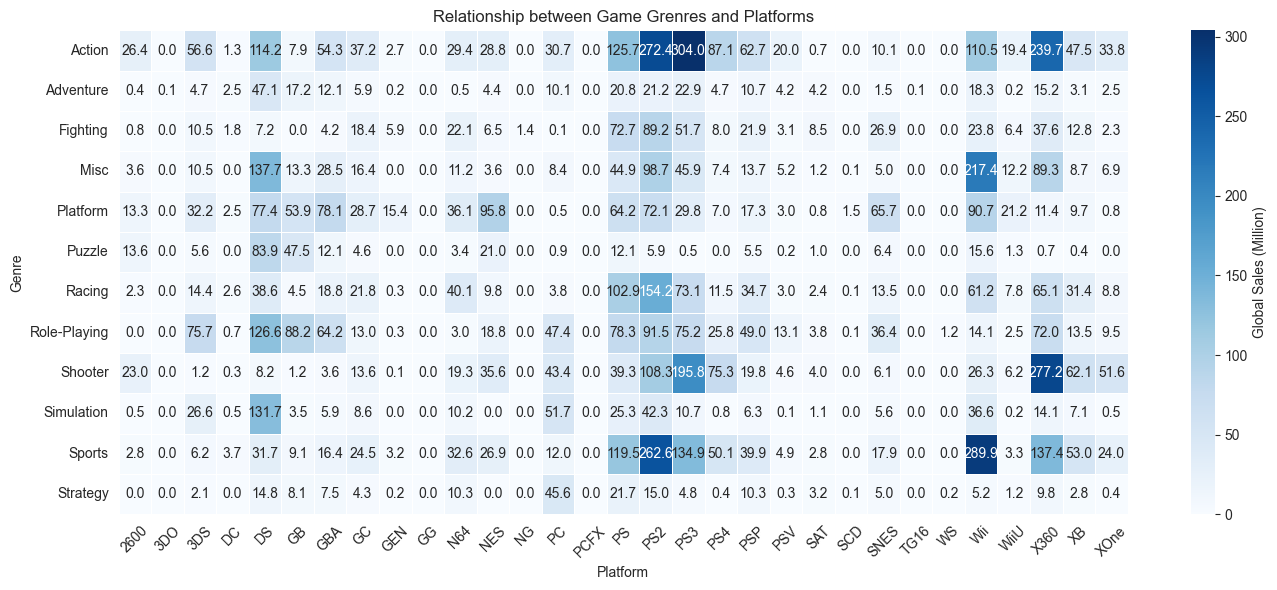

In [23]:
# Aggregate data
platform_genre_sales = video_games.groupby(['Platform','Genre'])['Global_Sales'].sum().reset_index()

# Convert to matrix format
heatmap_data = platform_genre_sales.pivot(index='Genre',columns='Platform',values='Global_Sales').fillna(0)

plt.figure(figsize=(14,6))
# Create a heatmap
sns.heatmap(heatmap_data,
            annot=True,
            cmap='Blues',
            fmt='.1f',
            linewidths=0.5,
            cbar_kws={'label':'Global Sales (Million)'}
)

plt.title('Relationship between Game Grenres and Platforms')
plt.xlabel("Platform")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("assets/relationship_between_genre_and_platform", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This heatmap displays the global sales distribution of different game genres across platforms:
- **Wii** shows high sales for **Sports (289.9M) and Misc (217.4M)** genres.
- **X360, PS2 and PS3** dominate in **Shooter, Action and Sports** genres.
- **DS** leads in **Puzzle (83.9M), Simulation(131.7M) and Role-Playing (126.6M)** genres.

##### What it means
- Certain genres are **strongly associated with specific platforms**.
- **Wii's lead** in casual-friendly genres reflects its **broad audience and motion control innovation**.
- Handhelds like **DS** performing well in RPGs, simulation, and puzzle games indicates **the appeal of these game genres in mobile-friendly environments**.
- **Shooter and action games** thrive on more powerful home consoles because of **better graphics and controls**.

##### Recommendation
- Publishers should **prioritize shooter and action games on home consoles, and RPGs/simulation/puzzle on portable platforms**.
- When launching new games, use heatmap to **target genre-platform combinations with proven demand to reduce risk**.

### Sales Trends of the Top 5 Platforms

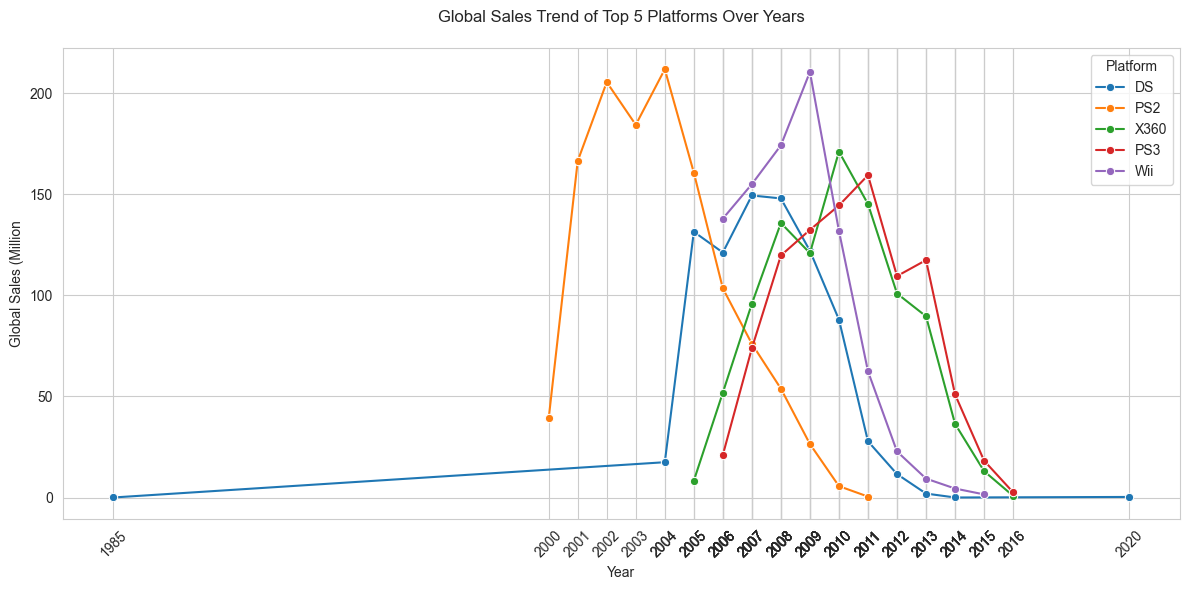

In [24]:
# Get top 5 platforms by total global sales
top5_platforms = (
    video_games.groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the data for these platforms
top5_data = video_games[video_games['Platform'].isin(top5_platforms)]

# Aggregate by year and platform
platform_by_year = (
    top5_data.groupby(['Year','Platform'])['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Year')
)

plt.figure(figsize=(12,6))
sns.lineplot(platform_by_year,x='Year',y='Global_Sales',hue='Platform',marker='o')

plt.title('Global Sales Trend of Top 5 Platforms Over Years\n')
plt.xlabel('Year')
plt.ylabel('Global Sales (Million')
plt.xticks(platform_by_year['Year'],rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.savefig("assets/top5_platform_lifecycle", dpi=300, bbox_inches='tight')
plt.show()

##### What the data shows
This line chart illustrates the yearly global sales of the top 5 platforms:
- **PS2** peaked early around **2002-2004**, reaching over **200 million dollars**.
- **Wii and DS** both experienced steep rises, hitting sales peak around **2007-2009**.
- **X360 and PS3** had similar trends and peaked in 2010-2011.
- **Post-2011, all platforms** show significant declines.

##### What it means
- This chart reflects a classic **platform lifecycle** - rapid adoption, peak sales within 3 to 5 years, and followed by a decline.
- **Nintendo platforms (DS and Wii)** grew rapidly, probably due to **casual and family-friendly markets**, but their popularity also declined quickly.
- **Sony and Microsoft platforms (PS2, PS3, and X360)** had **longer and stable peak periods** because of larger core gaming players and titles that remained popular for years.
- A platform's decline is often linked to **the release and growing popularity of next-generation consoles**.

##### Recommendation
- **Plan major game releases with the 2nd-4th year of a platform's lifecycle**, when adoption rates and user engagement reach peak.
- Handheld and casual platforms like DS and Wii **tend to see rapid growth followed by a quicker decline**, which is ideal for games with **shorter development time and faster release schedules**.
- The extended lifespan of consoles like PlayStation and Xbox makes them reliable platforms for **long-term support and content maintenance across multiple years**.
- **Moving key IPs to next-generation consoles** before the current platform declines occurs is key to minimizing revenue loss.

# Conclusion
This analysis provides valuable insights into platform performance, genre preferences, publisher efficiency, and regional market dynamics. The key takeaways are as follows:
- **Genre-Platform Fit:** Action, Sports, and Shooter games lead global sales, but genre popularity is closely tied to platform type. RPGs perform best on handheld devices, while Shooter dominate on core consoles.
- **Publisher Efficiency:** High output doesn't guarantee high returns. Publishers like Nintendo outperform in both total sales and per-title averages.
- **Regional Preferences:** North America favors fast-paced genres like Shooter and Sports, Japan prefers RPGs and Simulation games, while Europe shows a more balanced mix.
- **Platform Lifecycle Patterns:** Most platforms reach their sales peak between years 2 and 4 after launch. This underscores the need to plan game releases and IP transitions around the platform lifecycle for maximum impact.

These insights support smarter, data-driven decisions in game development, regional marketing, platform targeting, and publisher collaboration, helping industry strengthen their strategy and stay ahead in a highly competitive market.